# Autoencoder

## Preprocess

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [96]:
adl = pd.read_pickle("../data/data_adl.pkl")

In [16]:
df_ae1 = np.load("../npy/data_adl_ae1.npy")
df_ae2 = np.load("../npy/data_adl_ae2.npy")
df_ae3 = np.load("../npy/data_adl_ae3.npy")

df_pcfa1 = np.load("../npy/data_adl_pcfa1.npy")
df_pcfa1_varimax = np.load("../npy/data_adl_pcfa1_varimax.npy")
df_pcfa2 = np.load("../npy/data_adl_pcfa2.npy")
df_pcfa2_varimax = np.load("../npy/data_adl_pcfa2_varimax.npy")
df_pcfa3 = np.load("../npy/data_adl_pcfa2.npy")
df_pcfa3_varimax = np.load("../npy/data_adl_pcfa3_varimax.npy")

df_mlfa1 = np.load("../npy/data_adl_mlfa1.npy")
df_mlfa1_oblimin = np.load("../npy/data_adl_mlfa1_oblimin.npy")
df_mlfa1_varimax = np.load("../npy/data_adl_mlfa1_varimax.npy")
df_mlfa2 = np.load("../npy/data_adl_mlfa2.npy")
df_mlfa2_oblimin = np.load("../npy/data_adl_mlfa2_oblimin.npy")
df_mlfa2_varimax = np.load("../npy/data_adl_mlfa2_varimax.npy")
df_mlfa3 = np.load("../npy/data_adl_mlfa3.npy")
df_mlfa3_oblimin = np.load("../npy/data_adl_mlfa3_oblimin.npy")
df_mlfa3_varimax = np.load("../npy/data_adl_mlfa3_varimax.npy")

df_pca1 = np.load("../npy/data_adl_pca1.npy")
df_pca2 = np.load("../npy/data_adl_pca2.npy")
df_pca3 = np.load("../npy/data_adl_pca3.npy")

## Plots

### Function Definition

In [68]:
def comparison_plot(df, col=[], title="", ax=None):
    if ax:
        try:
            # ax.figure(dpi=80)
            sns.scatterplot(x=df[:,0], y=df[:,1], color="blue", size=1, legend=None).set(title=title)
            try:
                ax.set_xlabel(col[0])
                ax.set_ylabel(col[1])
            except:
                pass
        except:
            pass
    else:
        plt.figure(dpi=80)
        sns.scatterplot(x=df[:,0], y=df[:,1], color="blue", size=1, legend=None).set(title=title)
        try:
            plt.xlabel(col[0])
            plt.ylabel(col[1])
        except:
            pass

### Autoencoder & Inputs

In [100]:
pd_ae1 = pd.DataFrame(df_ae1, columns=["Bottleneck_1"])
pd_ae2 = pd.DataFrame(df_ae2, columns=["Bottleneck_1", "Bottleneck_2"])
pd_ae3 = pd.DataFrame(df_ae3, columns=["Bottleneck_1", "Bottleneck_2", "Bottleneck_3"])

#### Correlation

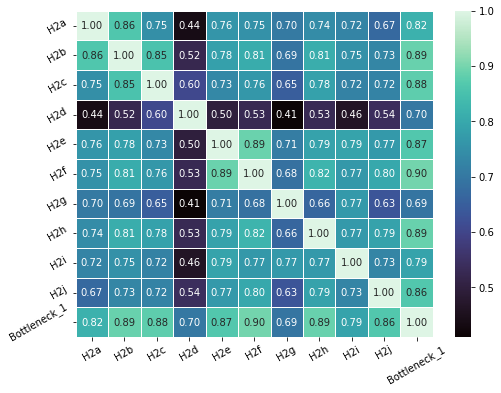

In [124]:
ae1_corr = pd.concat([adl, pd_ae1], axis=1).corr()
col_names = ae1_corr.columns

plt.figure(figsize=(8, 6))
chart = sns.heatmap(ae1_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set_yticklabels(chart.get_yticklabels(), rotation=30)
print()

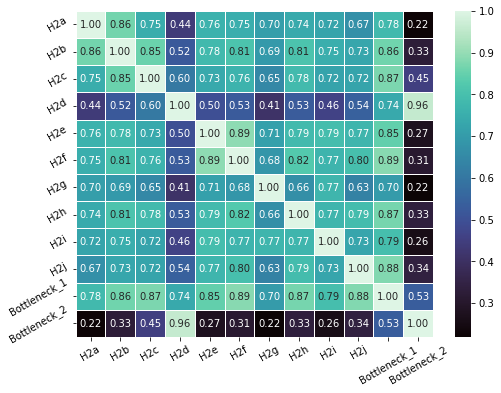

In [126]:
ae2_corr = pd.concat([adl, pd_ae2], axis=1).corr()
col_names = ae2_corr.columns

plt.figure(figsize=(8, 6))
chart = sns.heatmap(ae2_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set_yticklabels(chart.get_yticklabels(), rotation=30)
print()

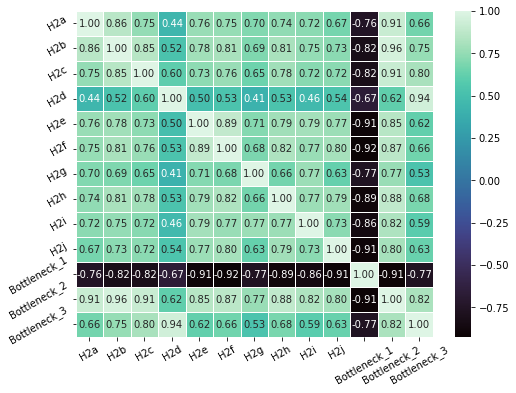

In [127]:
ae3_corr = pd.concat([adl, pd_ae3], axis=1).corr()
col_names = ae3_corr.columns

plt.figure(figsize=(8, 6))
chart = sns.heatmap(ae3_corr, annot=True, fmt=".2f", linewidth=.5, cmap="mako")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set_yticklabels(chart.get_yticklabels(), rotation=30)
print()

#### Scatter Plot

In [129]:
adl_ae1 = pd.concat([adl, pd_ae1], axis=1)
adl_ae2 = pd.concat([adl, pd_ae2], axis=1)
adl_ae3 = pd.concat([adl, pd_ae3], axis=1)

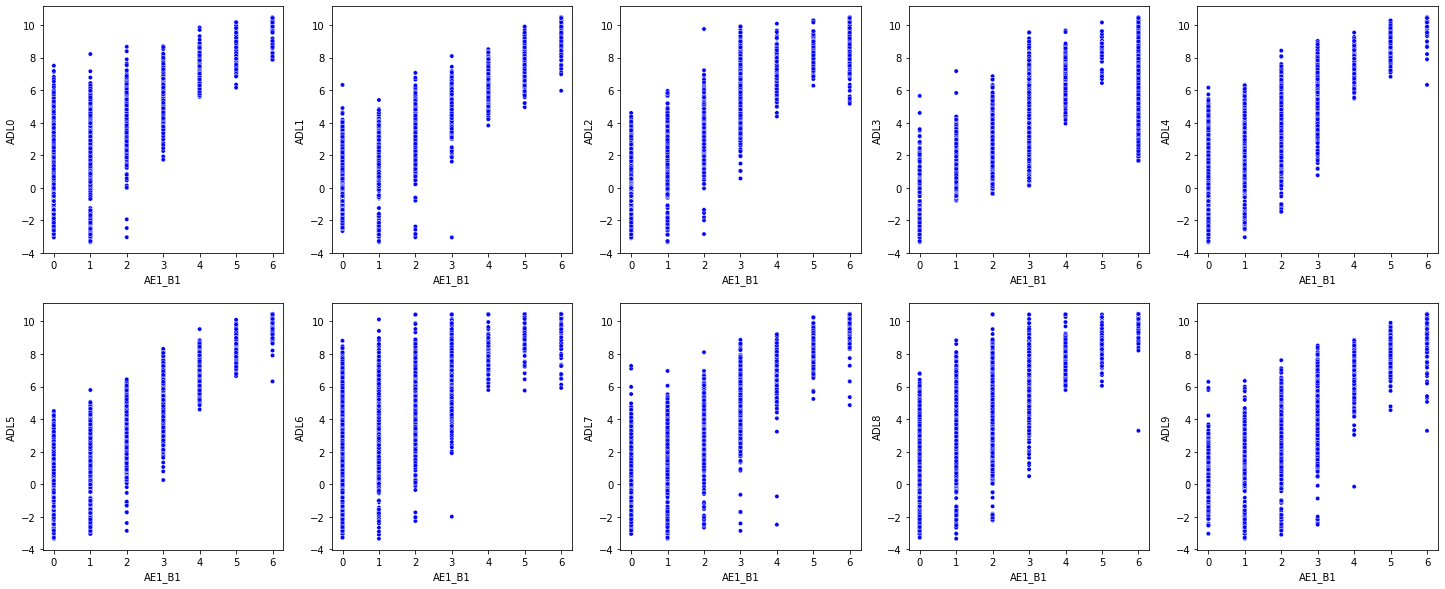

In [142]:
factor_num = 1

fig = plt.figure(figsize=(5 * 5, 5 * 2))
gs = fig.add_gridspec(2, 5)
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10] = [None, None, None, None, None, None, None, None, None, None]
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        ax[index] = fig.add_subplot(gs[i, j])
        comparison_plot(np.column_stack((adl_ae1.to_numpy()[:,index], adl_ae1.to_numpy()[:,10])), col=[f"AE{factor_num}_B{factor_num}", f"ADL{index+1}"], title="", ax=ax[index])

### 1-Bottleneck Autoencoder & 1-Factor FA & 1-PC PCA

In [94]:
plot_num = 3
size = 6
factor_num = 1

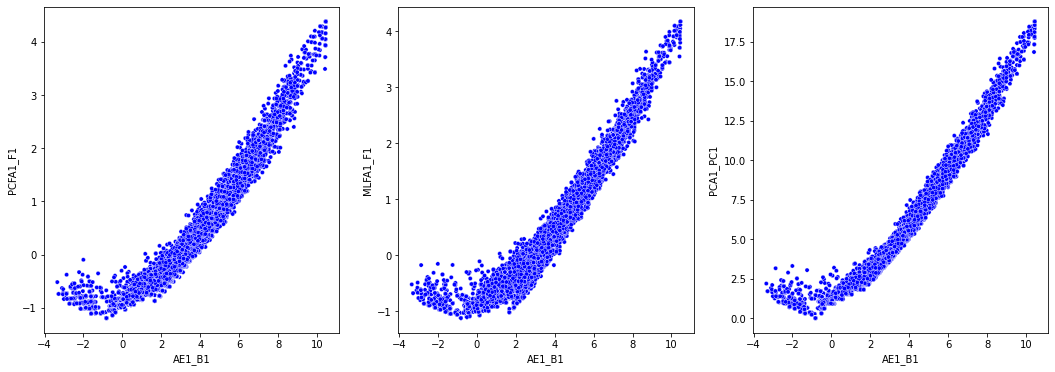

In [95]:
fig = plt.figure(figsize=(size * plot_num, size))
gs = fig.add_gridspec(1, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae1[:,0], df_pcfa1[:,0])), col=[f"AE{factor_num}_B{factor_num}", f"PCFA{factor_num}_F{factor_num}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae1[:,0], df_mlfa1[:,0])), col=[f"AE{factor_num}_B{factor_num}", f"MLFA{factor_num}_F{factor_num}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[0, 2])
comparison_plot(np.column_stack((df_ae1[:,0],  df_pca1[:,0])), col=[f"AE{factor_num}_B{factor_num}", f"PCA{factor_num}_PC{factor_num}"], title="", ax=ax3)

### 2-Bottleneck Autoencoder & 2-Factor FA & 2-PC PCA

In [72]:
plot_num = 2
size = 5
factor_num = 2

#### AE Bottleneck_1 Plots

In [86]:
ae_dim_index = 1

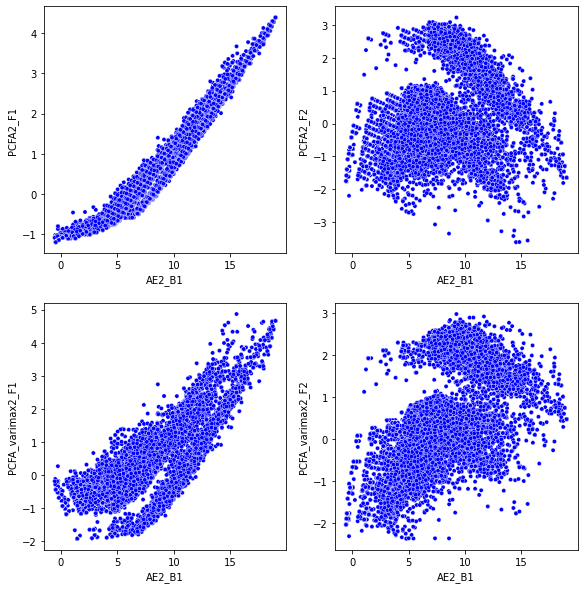

In [87]:
fig = plt.figure(figsize=(size * plot_num, size * 2))
gs = fig.add_gridspec(2, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_pcfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{2}"], title="", ax=ax4)

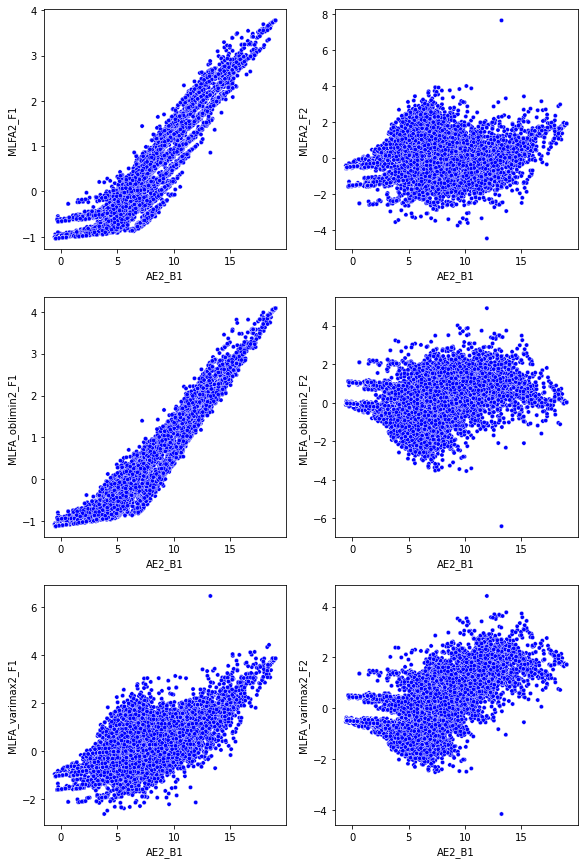

In [88]:
fig = plt.figure(figsize=(size * plot_num, size * 3))
gs = fig.add_gridspec(3, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_oblimin[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_oblimin[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{2}"], title="", ax=ax4)
ax5 = fig.add_subplot(gs[2, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{1}"], title="", ax=ax5)
ax6 = fig.add_subplot(gs[2, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_mlfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{2}"], title="", ax=ax6)

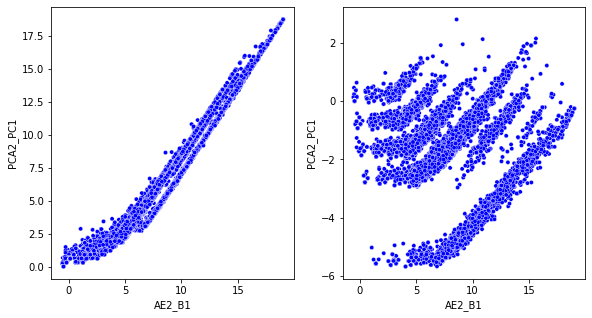

In [89]:
fig = plt.figure(figsize=(size * plot_num, size))
gs = fig.add_gridspec(1, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,0], df_pca2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,0], df_pca2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax2)

#### AE Bottleneck_2 Plots

In [90]:
ae_dim_index = 2

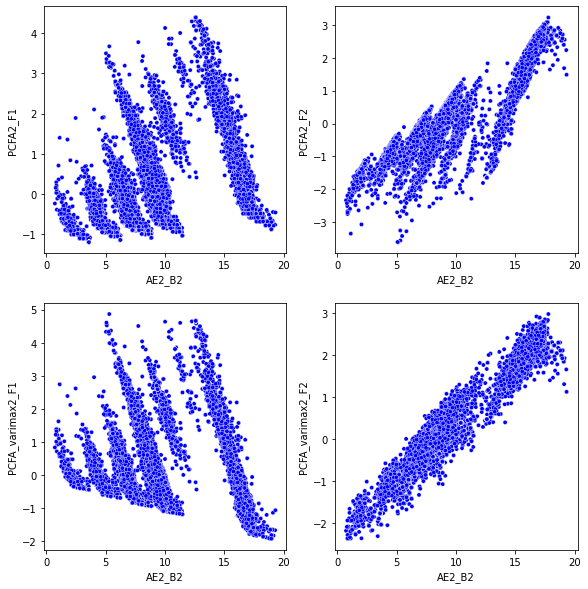

In [91]:
fig = plt.figure(figsize=(size * plot_num, size * 2))
gs = fig.add_gridspec(2, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_pcfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCFA_varimax{factor_num}_F{2}"], title="", ax=ax4)

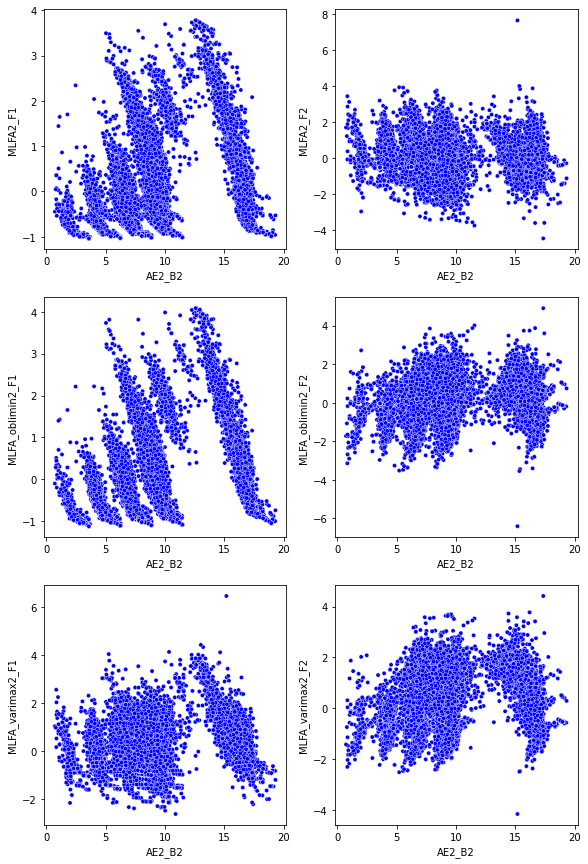

In [92]:
fig = plt.figure(figsize=(size * plot_num, size * 3))
gs = fig.add_gridspec(3, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA{factor_num}_F{2}"], title="", ax=ax2)
ax3 = fig.add_subplot(gs[1, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_oblimin[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{1}"], title="", ax=ax3)
ax4 = fig.add_subplot(gs[1, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_oblimin[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_oblimin{factor_num}_F{2}"], title="", ax=ax4)
ax5 = fig.add_subplot(gs[2, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_varimax[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{1}"], title="", ax=ax5)
ax6 = fig.add_subplot(gs[2, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_mlfa2_varimax[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"MLFA_varimax{factor_num}_F{2}"], title="", ax=ax6)

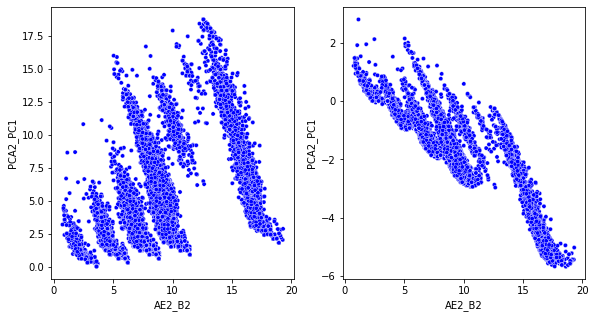

In [93]:
fig = plt.figure(figsize=(size * plot_num, size))
gs = fig.add_gridspec(1, plot_num)
ax1 = fig.add_subplot(gs[0, 0])
comparison_plot(np.column_stack((df_ae2[:,1], df_pca2[:,0])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
comparison_plot(np.column_stack((df_ae2[:,1], df_pca2[:,1])), col=[f"AE{factor_num}_B{ae_dim_index}", f"PCA{factor_num}_PC{1}"], title="", ax=ax2)

### Autoencoder vs PCA

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_ae2_std = scaler.fit_transform(df_ae2)

scaler = StandardScaler()
df_pca2_std = scaler.fit_transform(df_pca2)

<AxesSubplot:>

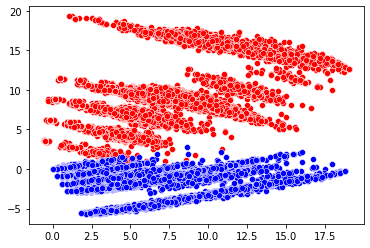

In [12]:
sns.scatterplot(x=df_ae2[:,0], y=df_ae2[:,1], color="red")
sns.scatterplot(x=df_pca2[:,0], y=df_pca2[:,1], color="blue")

<AxesSubplot:>

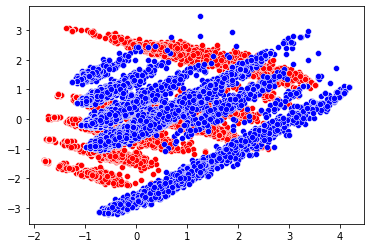

In [13]:
sns.scatterplot(x=df_ae2_std[:,0], y=df_ae2_std[:,1], color="red")
sns.scatterplot(x=df_pca2_std[:,0], y=df_pca2_std[:,1], color="blue")